In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st

In [195]:
gasoline_price_df = pd.read_csv("gas_price_2.csv")
gasoline_price_df.head()

,county,Fuel,Year,Vehicles,Month,Los Angeles Dollars per Gallon,San Francisco Dollars per Gallon,Yearly,EV Amount,EV amount change in %,LA Annually Average Gasoline Price,LA Gas Price Change in %,SF Annually Average Gasoline Price,SF Gas Price Change in %
0,Alameda,Battery Electric,2020,4340,18-Jan,$3.37,$3.28,2020.0,76020.0,NaN,$3.12,-14.76%,$3.26,-13.31%
1,Alameda,Battery Electric,2021,4750,18-Feb,$3.52,$3.42,2021.0,85820.0,12.89%,$4.07,30.45%,$4.23,29.75%
2,Alameda,Battery Electric,2022,5580,18-Mar,$3.57,$3.53,2022.0,106275.0,23.83%,$5.38,32.19%,$5.52,30.50%
3,Alpine,Battery Electric,2020,5,18-Apr,$3.66,$3.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alpine,Battery Electric,2021,15,18-May,$3.70,$3.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
gasoline_price_df= gasoline_price_df.drop(columns = ["Vehicles","county","Month","Fuel","Year","Los Angeles Dollars per Gallon","San Francisco Dollars per Gallon"])
gasoline_price_df

,Yearly,EV Amount,EV amount change in %,LA Annually Average Gasoline Price,LA Gas Price Change in %,SF Annually Average Gasoline Price,SF Gas Price Change in %
0,2020.0,76020.0,NaN,$3.12,-14.76%,$3.26,-13.31%
1,2021.0,85820.0,12.89%,$4.07,30.45%,$4.23,29.75%
2,2022.0,106275.0,23.83%,$5.38,32.19%,$5.52,30.50%
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
gasoline_price_df = gasoline_price_df.dropna(subset=["Yearly"])
gasoline_price_df

,Yearly,EV Amount,EV amount change in %,LA Annually Average Gasoline Price,LA Gas Price Change in %,SF Annually Average Gasoline Price,SF Gas Price Change in %
0,2020.0,76020.0,NaN,$3.12,-14.76%,$3.26,-13.31%
1,2021.0,85820.0,12.89%,$4.07,30.45%,$4.23,29.75%
2,2022.0,106275.0,23.83%,$5.38,32.19%,$5.52,30.50%


In [199]:
gasoline_price_df = gasoline_price_df.copy()
gasoline_price_df['Yearly'] = gasoline_price_df['Yearly'].astype(int)
gasoline_price_df

,Yearly,EV Amount,EV amount change in %,LA Annually Average Gasoline Price,LA Gas Price Change in %,SF Annually Average Gasoline Price,SF Gas Price Change in %
0,2020,76020.0,NaN,$3.12,-14.76%,$3.26,-13.31%
1,2021,85820.0,12.89%,$4.07,30.45%,$4.23,29.75%
2,2022,106275.0,23.83%,$5.38,32.19%,$5.52,30.50%


posx and posy should be finite values
posx and posy should be finite values


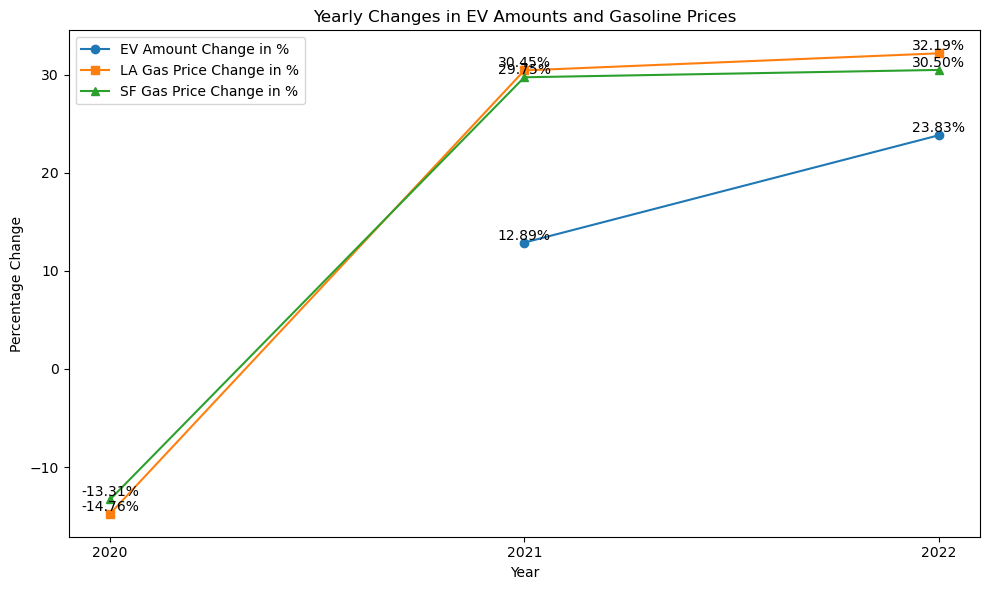

In [178]:
x = gasoline_price_df['Yearly']

# Your y-axes
y1 = gasoline_price_df['EV amount change in %'].str.rstrip('%').astype('float') # If it's a string with %, convert to float
y2 = gasoline_price_df['LA Gas Price Change in %'].str.rstrip('%').astype('float') # Adjust as necessary
y3 = gasoline_price_df['SF Gas Price Change in %'].str.rstrip('%').astype('float') # Adjust as necessary

plt.figure(figsize=(10, 6)) # Creates a new figure with a specified size

# Plot each line
plt.plot(x, y1, label='EV Amount Change in %', marker='o')
plt.plot(x, y2, label='LA Gas Price Change in %', marker='s')
plt.plot(x, y3, label='SF Gas Price Change in %', marker='^')

# Adding titles and labels
plt.title('Yearly Changes in EV Amounts and Gasoline Prices')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.xticks(x)  # Ensure we have ticks for every year present
plt.legend()

for i, txt in enumerate(y1):
    plt.text(x[i], y1[i], f'{txt:.2f}%', ha='center', va='bottom') 
for i, txt in enumerate(y2):
    plt.text(x[i], y2[i], f'{txt:.2f}%', ha='center', va='bottom')
for i, txt in enumerate(y3):
    plt.text(x[i], y3[i], f'{txt:.2f}%', ha='center', va='bottom') 
    
# Show plot
plt.tight_layout()
plt.show()